## LASSO and Random Forest fits

Linear basis: $B_x, B_y, J_x, J_y$

# Load/import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
#from sklearn.metrics import mean_squared_error,mean_absolute_error

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from preprocess import *

## Download data for Rm = $1.5 \times 10^4$

In [3]:
# COMMENT out if data hasn't been downloaded yet
#!wget -O mfields_R15e3.npz https://sid.erda.dk/public/archives/0cf0c2b6d34e20da8971304b06d8f913/pencil/alpha2/shock_k10_R15000_256_xyaver_alpha_eta/mfields.npz

--2019-05-20 22:57:55--  https://sid.erda.dk/public/archives/0cf0c2b6d34e20da8971304b06d8f913/pencil/alpha2/shock_k10_R15000_256_xyaver_alpha_eta/mfields.npz
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65800718 (63M)
Saving to: ‘mfields_R15e3.npz’

mfields_R15e3.npz   100%[===================>]  62.75M  2.64MB/s    in 25s     

2019-05-20 22:58:35 (2.54 MB/s) - ‘mfields_R15e3.npz’ saved [65800718/65800718]



## Pre-process

Time averaged data stored in a pandas dataframe

In [4]:
df15 = gen_df_tave(fname='mfields_R15e3.npz',t1=1500,t2=-1,verbose=0)
#df05 = gen_df_tave(fname=pth + 'mfields_R5e2.npz',t1=4000,t2=5000,verbose=0)

In [5]:
df15.head()

,Bx,By,Jx,Jy,Ex,Ey
0,0.700520,0.705890,-0.602242,-0.644567,0.000467,0.000502
1,0.684174,0.720619,-0.598669,-0.688552,0.000453,0.000515
2,0.666762,0.735254,-0.594767,-0.729381,0.000439,0.000527
3,0.648423,0.749906,-0.600635,-0.764473,0.000425,0.000538
4,0.629228,0.764784,-0.610741,-0.799537,0.000411,0.000551


# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from preprocess import train_test_seq

lr = LinearRegression(fit_intercept=False)

fld  = ['Ex']
flds = ['Ex','Ey']
tst_sz = 0.2

df15_ss, scl = scale_df(df15)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_seq(df15_ss.drop(flds,axis=1),df15_ss[fld],test_size=tst_sz)
lr.fit(X_train_lr,y_train_lr)
y_pred_lr = lr.predict(X_test_lr)
print(lr.coef_)

Test size: 0.2
[[ 0.83671663  0.01789618 -0.14541893  0.04021911]]


# Lasso

In [11]:
from lasso_fits import *

Test size: 0.2
Test,train shapes: (52, 4) (204, 4)
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Means of CV folds: [-0.05288967 -0.05235723 -0.17375582 -0.75977684 -0.89966289]
STDs of CV folds : [0.00576893 0.00092464 0.09400857 0.4356222  0.29573615]
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002499      0.000068         0.001223        0.000161   
1       0.003650      0.000751         0.001815        0.000049   
2       0.003797      0.000437         0.001443        0.000348   
3       0.003201      0.000634         0.001104        0.000020   
4       0.002370      0.000109         0.001059        0.000034   

  param_lasso__alpha                   params  split0_test_score  \
0              0.001  {'lasso__alpha': 0.001}          -0.047121   
1               0.01   {'lasso__alpha': 0.01}          -0.053282   
2                0.1    {'lasso__alpha': 0.1}          -0.267764   
3                0.5    {'lasso__alpha': 0.5}          -1

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


Tuned Lasso Alpha: {'lasso__alpha': 0.01}
Tuned Lasso Score: -0.08078461865843758
BEST FIT model
Mean Absolute Error: 0.08078461865843758
LASSO score: 0.5747972811209139
Coefficients: [ 0.82428209 -0.         -0.14618915  0.0146555 ]


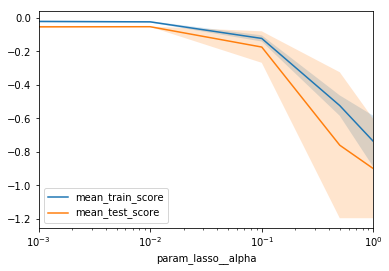

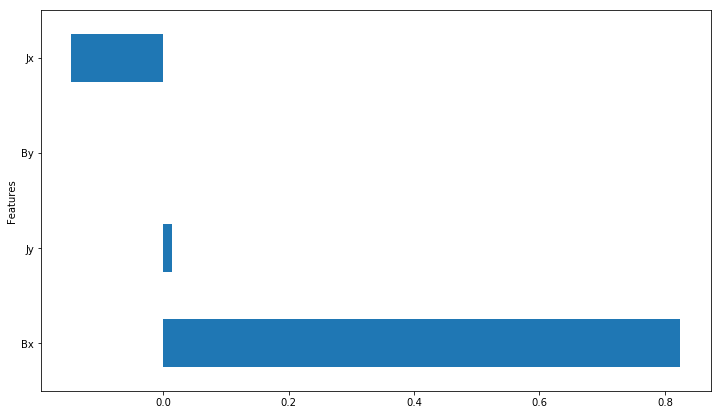

In [12]:
df15_ss, scl = scale_df(df15)
y_train,y_pred,y_test = lasso_gridcv(df15_ss)

# Random forests

In [13]:
from rf_fits import *

Test size: 0.2
Test,train shapes: (52, 4) (204, 4)
Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:    1.5s finished


Means of CV folds: [-0.2757629  -0.27597905 -0.27744725 -0.28108401 -0.2757629  -0.27597905
 -0.27744725 -0.28108401 -0.2757629  -0.27597905 -0.27744725 -0.28108401
 -0.36132524 -0.34985923 -0.34832559 -0.35940721 -0.36489766 -0.35305951
 -0.35152587 -0.36327113 -0.36681906 -0.35498091 -0.35344726 -0.3654327
 -0.2757629  -0.27597905 -0.27744725 -0.28108401 -0.2757629  -0.27597905
 -0.27744725 -0.28108401 -0.2757629  -0.27597905 -0.27744725 -0.28108401
 -0.14386544 -0.14074781 -0.14628522 -0.14897446 -0.14449562 -0.14138609
 -0.14660436 -0.14915768 -0.17924119 -0.17613969 -0.18142339 -0.18289937
 -0.26042293 -0.25331136 -0.25050166 -0.26065136 -0.26047873 -0.25566738
 -0.25372024 -0.2638704  -0.30681936 -0.29773853 -0.28510319 -0.29116541
 -0.14386544 -0.14074781 -0.14628522 -0.14897446 -0.14449562 -0.14138609
 -0.14660436 -0.14915768 -0.17924119 -0.17613969 -0.18142339 -0.18289937
 -0.14497664 -0.14479156 -0.13920734 -0.14233676 -0.19307227 -0.18817832
 -0.16307716 -0.15991005 -0.18918

<Figure size 432x288 with 0 Axes>

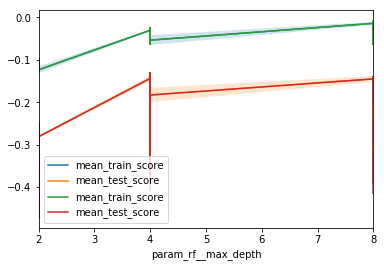

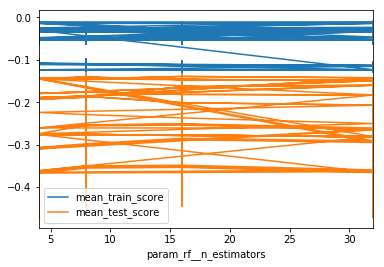

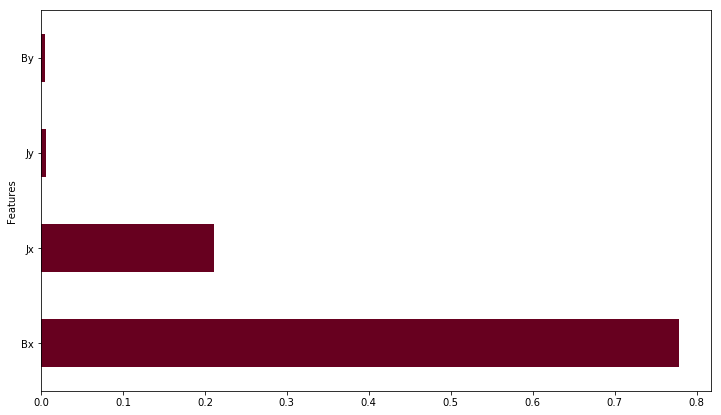

In [14]:
df15_ss, _ = scale_df(df15)
y_trainrf,y_predrf,y_testrf = rf_gridcv(df15_ss)#, fi_plts=True)

## Comparison: RF vs LASSO

In [ ]:
z_ax = np.linspace(0,2*np.pi,256)

fig,ax=plt.subplots()
        
fld_label = r"$\mathcal{E}_x$" #if fld=='Ex' else r"$\mathcal{E}_y$"
        
ax.plot(np.linspace(0,2*np.pi,256),df15_ss['Ex'],label=fld_label)
ax.plot(z_ax[y_train.shape[0]:],y_pred,'r--',lw=2,label="LASSO fit")
ax.plot(z_ax[y_train.shape[0]:],y_predrf,'g-.',lw=3,label="RF fit")

plt.axvline(x=0.8*z_ax[-1], color='k', linestyle='--')

ax.set_ylim([-1.5,1.5])
    
ax.legend()
ax.set_xlabel('z',fontsize=14)
    
fig.savefig('df15_SPACE_comparison.pdf',bbox_inches='tight')